<a href="https://colab.research.google.com/github/misspriyanshigupta-ctrl/Projects/blob/main/UFlaptop_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import necessary library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Loading the data

# from google.colab import files

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving laptop_prices.csv to laptop_prices (2).csv


## Show me the list of all the file names that were uploaded.

In [ ]:
uploaded.keys()

dict_keys(['laptop_prices (2).csv'])

## Load a dataset in a variable & display the first 5 rows of the dataset

In [ ]:
import pandas as pd

data = pd.read_csv('laptop_prices.csv')  # use the exact name shown in uploaded.keys()
data.head()


,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


## Information related to Data

## Tell the size/dimension of the dataframe(variable/dataframe)

In [ ]:
data.shape

(1275, 23)

Find how many rows&columns the dataset has, whether there are missing values & what type of data the data each column holds.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

## Finding the missing value

In [ ]:
data.isnull().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,0
ScreenW,0


## Spot outliers(like a very high or low value) & understands the

distribution of numeric columns before analysis or visualisation

In [ ]:
data.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


## Counts how many times each company appears in Company column and plots


<Axes: xlabel='Company'>

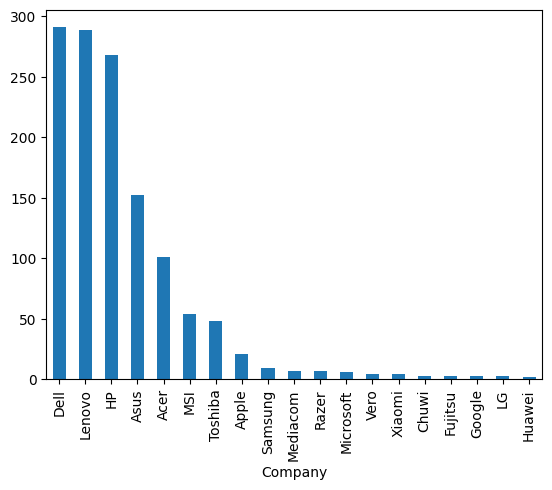

In [ ]:
data['Company'].value_counts().plot(kind = 'bar')   ##data['Company'] gives you a list of all company names in that column

## It counts how many times each OS appears in the dataset and plots it as a bar chart.

<Axes: xlabel='OS'>

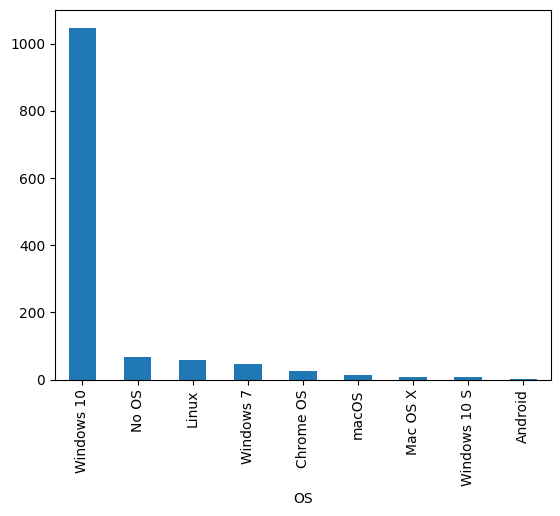

In [ ]:
data['OS'].value_counts().plot(kind='bar', x= data['OS'])

## This line creates a pie chart showing the percentage of each unique value in the Touchscreen column of data, with percentages formatted to two decimals and the chart titled “TouchScreen.

<Axes: title={'center': 'TouchScreen'}, ylabel='count'>

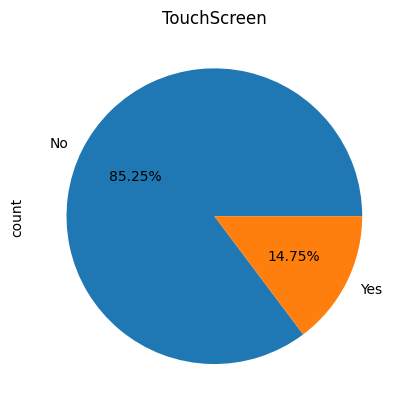

In [ ]:
data['Touchscreen'].value_counts().plot(kind='pie',autopct = '%.2f%%', title='TouchScreen')

## It counts how many times each RAM value appears in the dataset and then plots it as a bar chart.

<Axes: xlabel='Ram'>

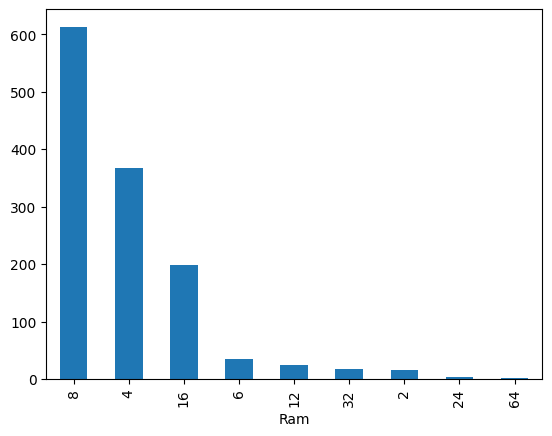

In [ ]:
data['Ram'].value_counts().plot(kind='bar')

## It counts how many laptops there are for each CPU company and then plots these counts as a pie chart showing percentages with two decimals.

<Axes: title={'center': 'CPU_company'}, ylabel='count'>

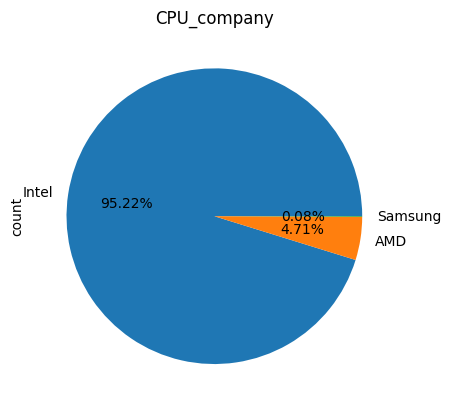

In [ ]:
data['CPU_company'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', title='CPU_company')

## This line counts how many times each GPU company appears in the dataset and then plots it as a pie chart showing percentages with the title 'GPU_company'.

<Axes: title={'center': 'GPU_company'}, ylabel='count'>

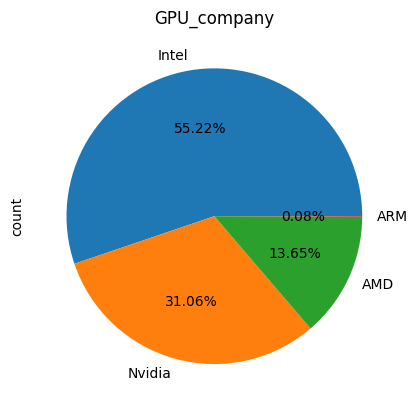

In [ ]:
data['GPU_company'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', title='GPU_company')

## It counts the occurrences of each unique value in IPSpanel and plots them as a pie chart with percentages displayed on each slice.

<Axes: ylabel='count'>

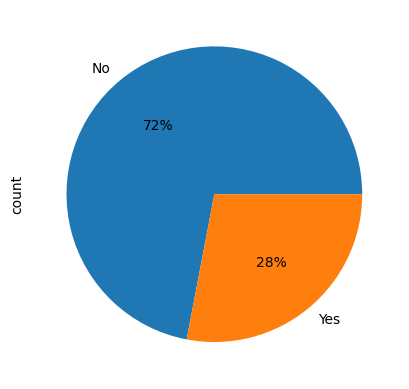

In [ ]:
data['IPSpanel'].value_counts().plot(kind = 'pie', autopct = '%.f%%')

##It counts how many times each unique value appears in the Inches column and then plots it as a bar chart.

<Axes: xlabel='Inches'>

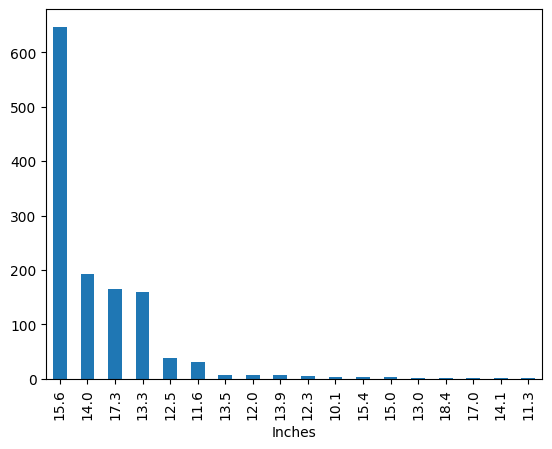

In [ ]:
data['Inches'].value_counts().plot(kind = 'bar')

##This line counts how many times each value appears in PrimaryStorageType and then plots those counts as a pie chart with percentages shown.

<Axes: ylabel='count'>

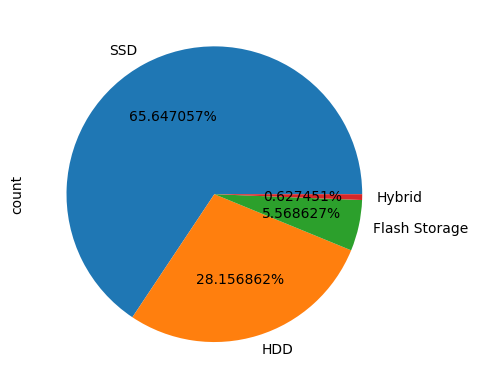

In [ ]:
data['PrimaryStorageType'].value_counts().plot(kind='pie',autopct='%2f%%')

##It counts how many times each value appears in PrimaryStorageType and shows it as a pie chart with percentages.

<Axes: ylabel='count'>

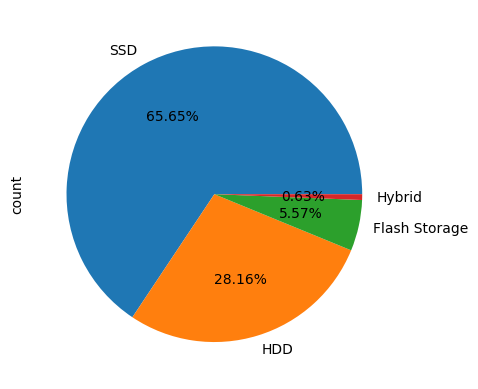

In [ ]:
data['PrimaryStorageType'].value_counts().plot(kind='pie',autopct = '%.2f%%')

##It counts how many times each value appears in the Screen column and then plots those counts as a bar chart.

<Axes: xlabel='Screen'>

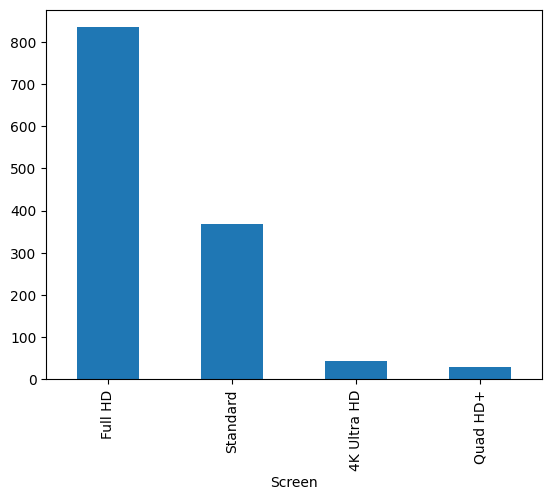

In [ ]:
data['Screen'].value_counts().plot(kind='bar')

##It counts how many times each value appears in SecondaryStorageType and then plots those counts as a bar chart.

<Axes: xlabel='SecondaryStorageType'>

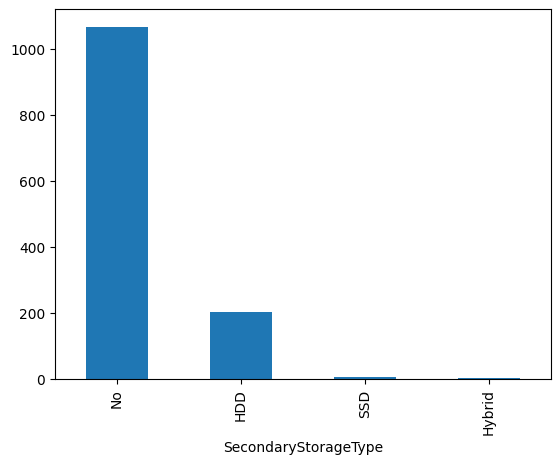

In [ ]:
data['SecondaryStorageType'].value_counts().plot(kind='bar')

## data.info() gives a summary of the DataFrame, showing the number of rows, columns, data types, and non-null counts.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

##This code creates a box plot of Price_euros for each OS, sets the figure size to 10×8, adds the title OS vs CPU_frequency, and displays the plot.

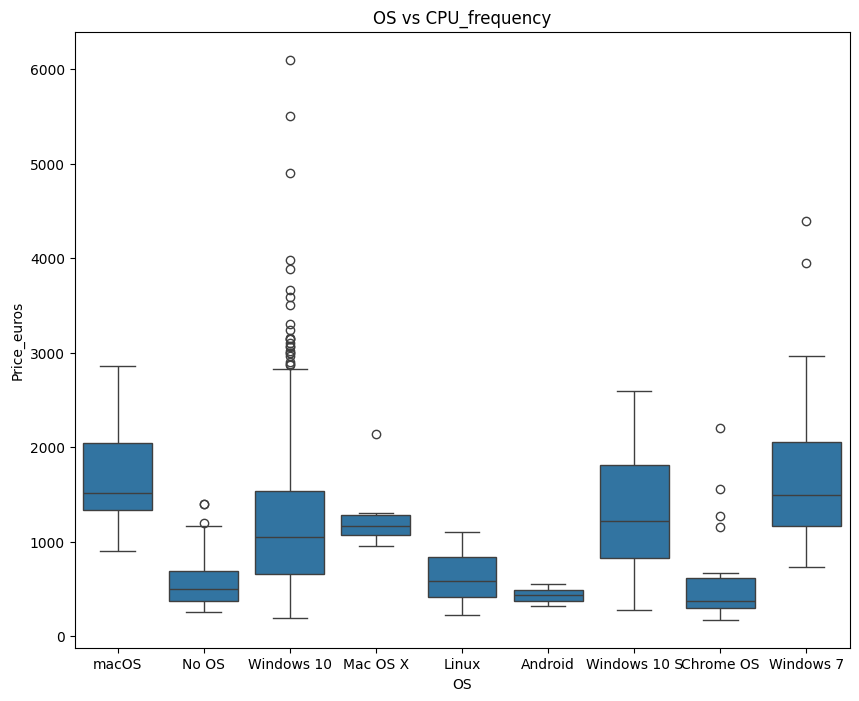

In [ ]:
plt.figure(figsize = (10,8))
sns.boxplot(x = data['OS'], y = data['Price_euros'])
plt.title('OS vs CPU_frequency')
plt.show()

##This code creates a bar plot showing how Price_euros varies with Touchscreen, separates bars by Screen type, and sets the figure size to 10×8 inches.

##This code creates a 10×8 inch figure, draws a bar plot showing Price_euros vs Touchscreen with bars colored by Screen, and then displays the plot.

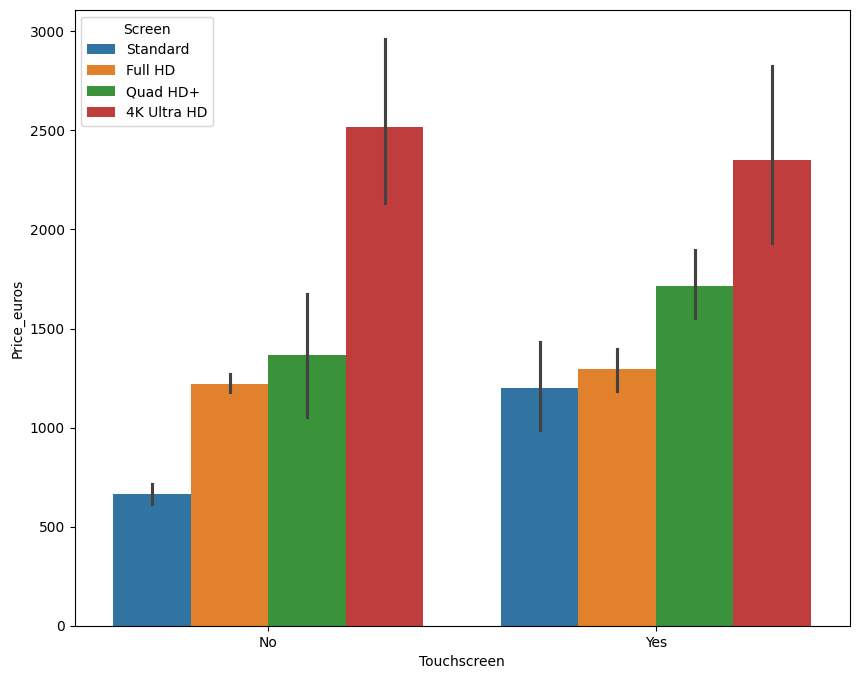

In [ ]:
plt.figure(figsize = (10,8))
sns.barplot(x = data['Touchscreen'], y = data['Price_euros'], hue = data['Screen'])
plt.show()

##This code creates a 10×8 sized figure and draws a bar plot showing how Price_euros varies with OS, grouped by Touchscreen, then displays it.

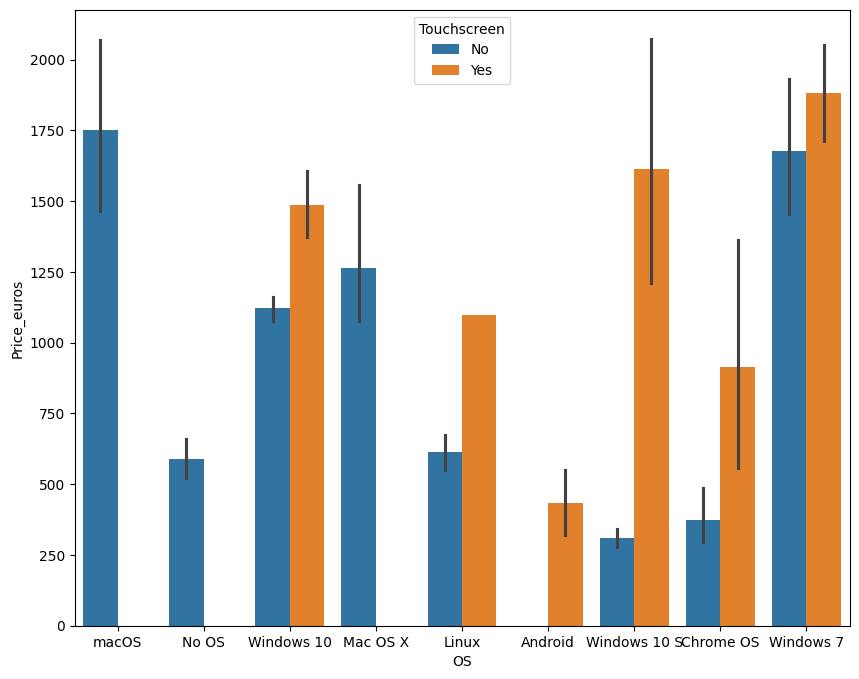

In [ ]:
plt.figure(figsize = (10,8))
sns.barplot(x = data['OS'],y = data['Price_euros'], hue = data['Touchscreen'])
plt.show()

## This code sets the figure size, draws a bar plot of laptop prices vs primary storage colored by secondary storage, and displays it.

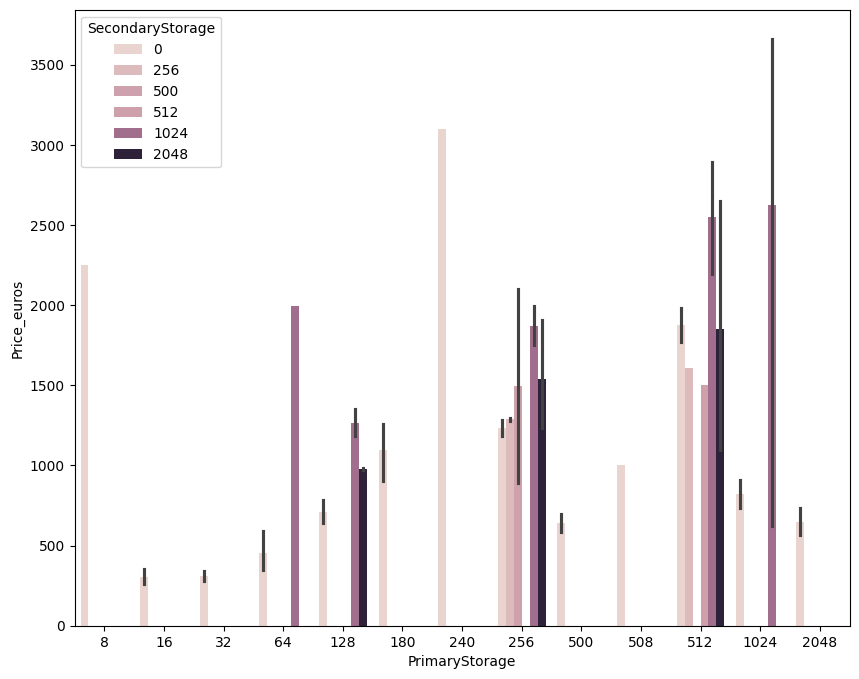

In [ ]:
plt.figure(figsize = (10,8))
sns.barplot(x = data['PrimaryStorage'], y = data['Price_euros'], hue = data['SecondaryStorage'])
plt.show()

##This code creates a bar chart showing how Price_euros varies with RetinaDisplay, grouping bars by PrimaryStorage, and sets the figure size to 10×8 inches.

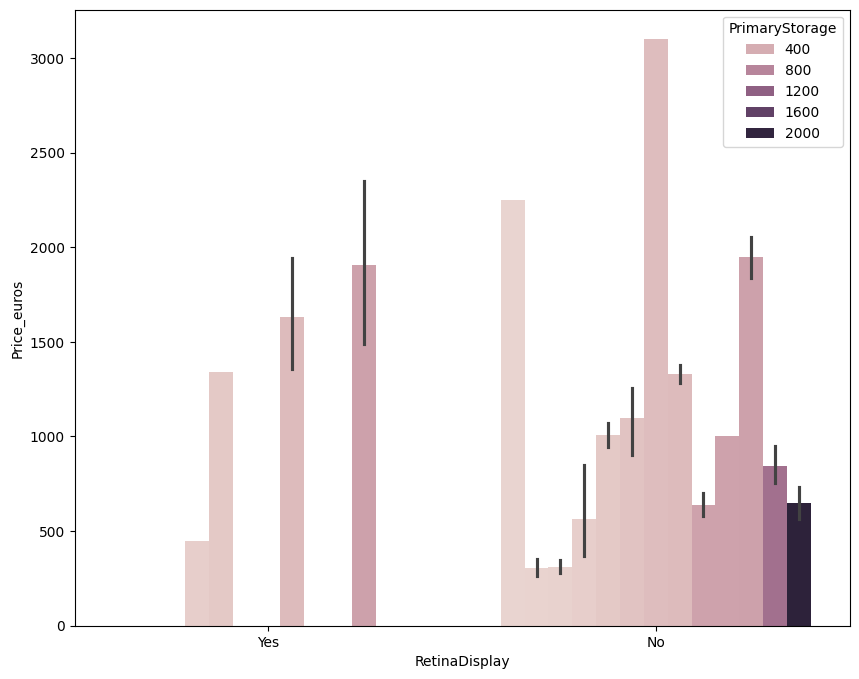

In [ ]:
plt.figure(figsize = (10,8))
sns.barplot(x = data['RetinaDisplay'], y = data['Price_euros'], hue = data['PrimaryStorage'])
plt.show()


##This line creates a scatter plot using Seaborn, plotting 'CPU_freq' on the x-axis, 'Ram' on the y-axis, and coloring the points differently for each 'OS' value.

<Axes: xlabel='CPU_freq', ylabel='Ram'>

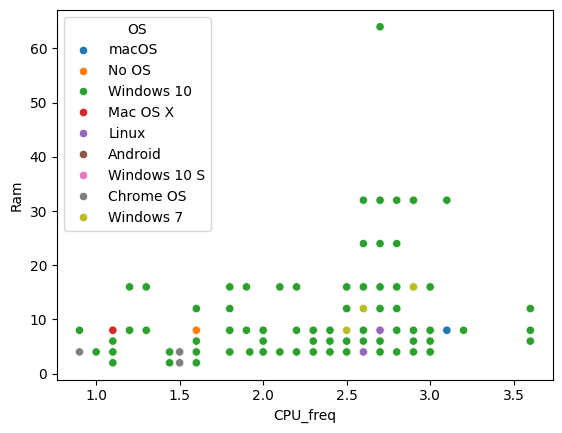

In [ ]:
sns.scatterplot(data = data, x = data['CPU_freq'], y = data['Ram'], hue = data['OS'])

##This line creates a scatter plot using Seaborn, plotting 'CPU_freq' on the x-axis, 'Ram' on the y-axis, and coloring the points differently for each 'OS' value.

<Axes: xlabel='CPU_freq', ylabel='Ram'>

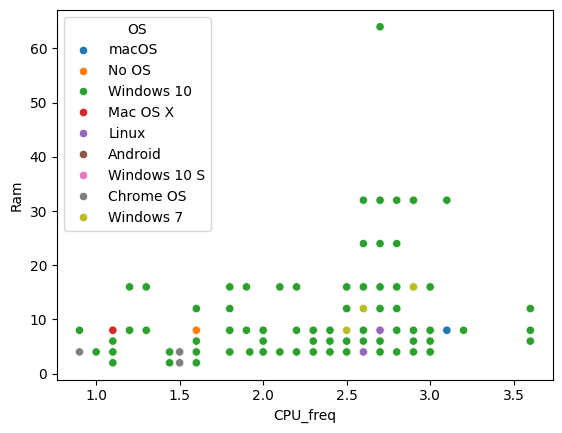

In [ ]:
sns.scatterplot(data = data, x = data['CPU_freq'], y = data['Ram'], hue = data['OS'])